<a href="https://colab.research.google.com/github/componavt/sns4human/blob/main/src/vk/nlp/lemma_tag_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install import-ipynb

In [ ]:
#pip install -U spacy

In [ ]:
#pip install vk-api

In [ ]:
pip install pymorphy2

In [ ]:
pip install emoji

In [ ]:
!pip install stop-words

In [3]:
from google.colab import drive
#import spacy
import pandas as pd
import emoji
import pymorphy2
import nltk
from nltk.tokenize import word_tokenize

In [4]:
drive.mount('/content/gdrive')
gc_folder = r"/content/gdrive/My Drive/sns4human/data/vk"

Mounted at /content/gdrive


In [ ]:
#pip install -U pip setuptools wheel

In [ ]:
#!python -m spacy download ru_core_news_sm

In [5]:
#nlp = spacy.load("ru_core_news_sm")
domains_groups = ['aparfenchikov', 'minnazrk', 'rk_nationalmuseum', 'olonmus']
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Частотный список всех слов по группам: официальные и музейные. В списке рассматриваются только те слова, которых нет в другой группе.**

In [ ]:
morph = pymorphy2.MorphAnalyzer()
alphabet = set('абвгдеёжзийклмнопрстуфхцчшщъыьэюя-abcdefghijklmnopqrstuvwxyz')
pass_chars = ['"', '\'', '.', ',', '\n', ':', ';', '?', '!', '', ' ',  '-', '_','#']
check_hash = False

official_groups = {}
museum_groups = {}

for domain in domains_groups:
    dictLemm = {}
    df = pd.read_csv(gc_folder + "/" +domain+ "_all_posts.csv", header=None, usecols=[1])
    for items in df.items():
        for i in range(1, len(items[1])):
          if not isinstance(items[1][i], str):
                continue
          tokens = word_tokenize(items[1][i])
          for word in tokens:
                if word == '#':
                    check_hash = True
                    continue
                if check_hash:
                    check_hash = False
                   # lemma = '#' + word
                    continue
                else:
                        set_word = set(word.lower())
                        if word in pass_chars or ":" in emoji.demojize(word) or not set_word.issubset(alphabet):
                            continue
                        lemma = morph.parse(word)[0].normal_form
                if domain == 'aparfenchikov' or domain == 'minnazrk':
                   if official_groups.get(lemma, 0) == 0:
                      official_groups[lemma] = 1
                   else:
                      official_groups[lemma] += 1
                else:
                    if museum_groups.get(lemma, 0) == 0:
                      museum_groups[lemma] = 1
                    else:
                      museum_groups[lemma] += 1
official_groups = dict(sorted(official_groups.items(), key=lambda item: item[1], reverse=True))
museum_groups = dict(sorted(museum_groups.items(), key=lambda item: item[1], reverse=True))
freq_words_offical = {}
freq_words_museum = {}
i = 0
for lemma, count in official_groups.items():
    if i == 100:
        break
    if lemma not in museum_groups:
        freq_words_offical[lemma] = count
        i += 1
j = 0
for lemma, count in museum_groups.items():
    if j == 100:
        break
    if lemma not in official_groups:
        freq_words_museum[lemma] = count
        j += 1
d = {'Частотные слова, которых нет в музейных группах': freq_words_offical.keys(),'Частота':freq_words_offical.values()}
df = pd.DataFrame(data=d)
df.to_csv(gc_folder + "/" +'frequency_official_words.csv', index=False, encoding='utf-8')

d = {'Частотные слова, которых нет в официальных группах': freq_words_museum.keys(),'Частота':freq_words_museum.values()}
df = pd.DataFrame(data=d)
df.to_csv(gc_folder + "/" +'frequency_museum_words.csv', index=False, encoding='utf-8')

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis("off")

In [12]:
from wordcloud import WordCloud
from stop_words import get_stop_words

text = ''
for word in freq_words_offical.keys():
    text += word + ' '

STOPWORDS_RU = get_stop_words('russian')
wordcloud = WordCloud(width = 2000,
                      height = 1500,
                      random_state=1,
                      background_color='black',
                      margin=20,
                      colormap='Pastel1',
                      collocations=False,
                      stopwords = STOPWORDS_RU).generate(text)

plot_cloud(wordcloud)

NameError: name 'freq_words_offical' is not defined

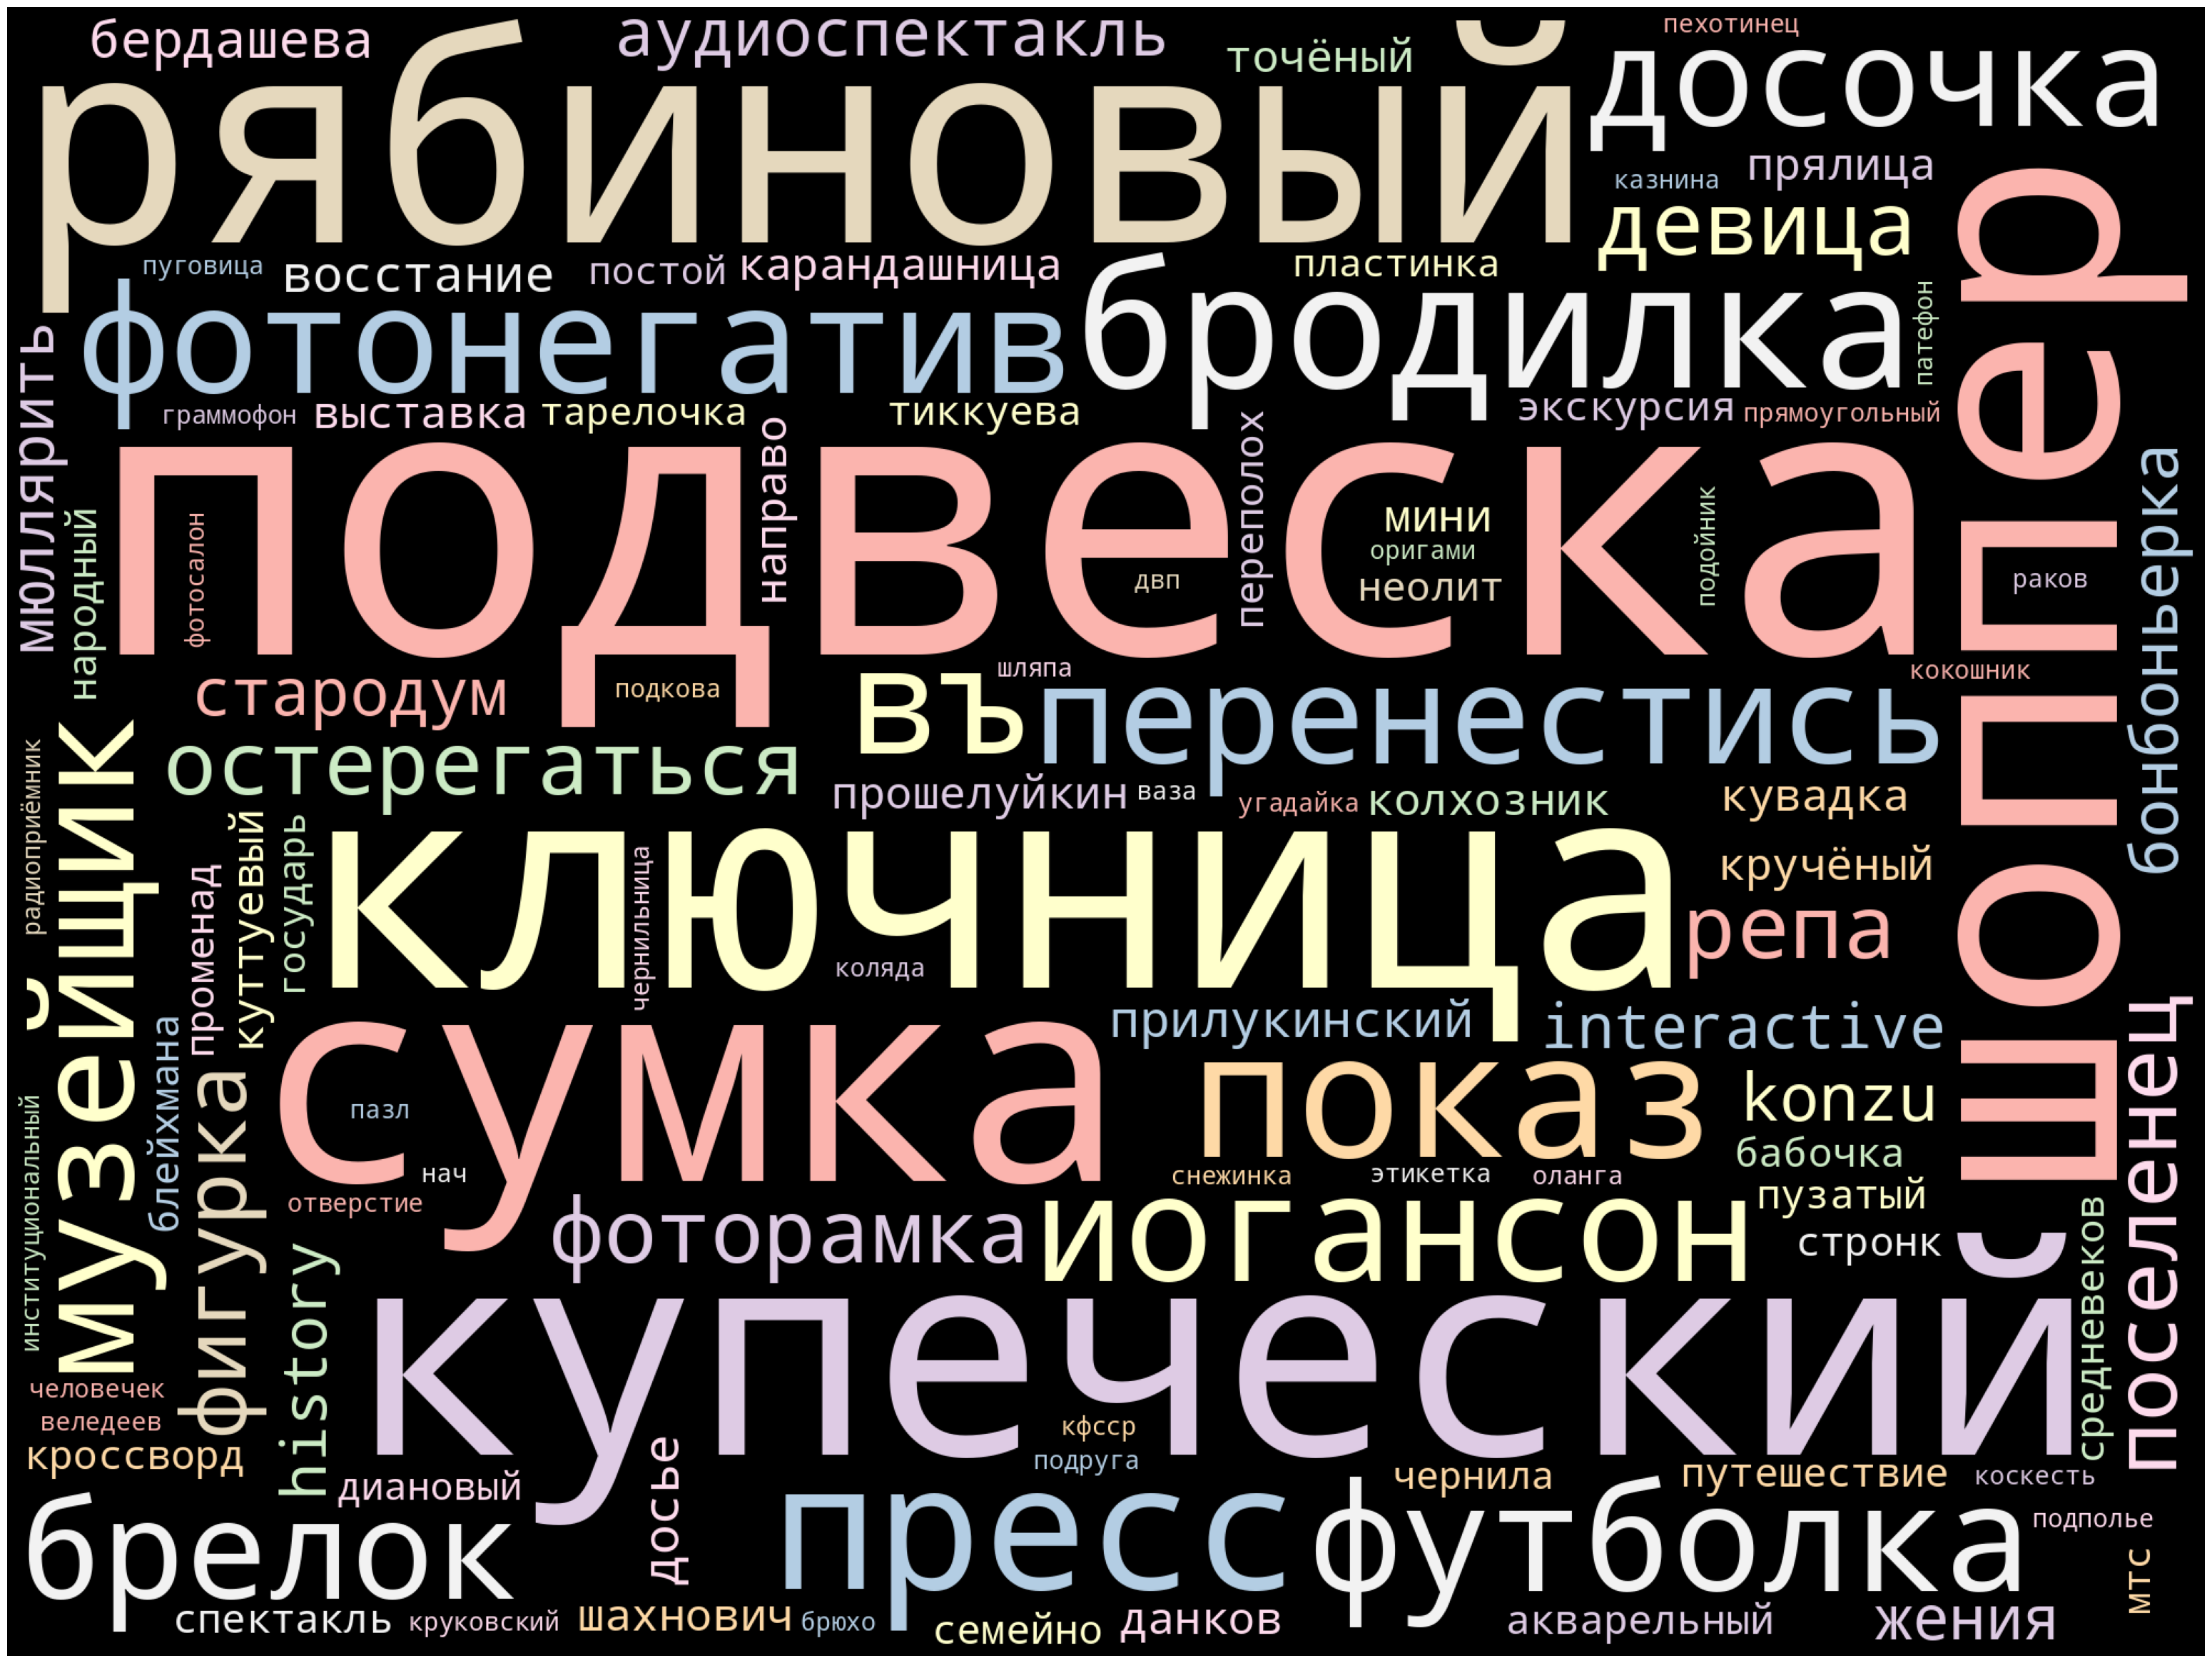

In [21]:
text = ''
for word in freq_words_museum.keys():
    text += word + ' '

STOPWORDS_RU = get_stop_words('russian')
wordcloud = WordCloud(width = 2000,
                      height = 1500,
                      random_state=1,
                      background_color='black',
                      margin=20,
                      colormap='Pastel1',
                      collocations=False,
                      stopwords = STOPWORDS_RU).generate(text)

plot_cloud(wordcloud)

**Статистика по 4 Вк группам: количество токенов, уникальных слов, постов, среднее количество слов в посте.**

In [ ]:
pass_chars = ['"', '\'', '.', ',', '\n', ':', ';', '?', '!', '', ' ',  '-', '_']
posts = []
tokens = []
unique_words = []
mid_len_post = []
alphabet = set('абвгдеёжзийклмнопрстуфхцчшщъыьэюя-abcdefghijklmnopqrstuvwxyz')

def lemmatization(sent):
    doc = nlp(sent)
    hashtag_flag = False
    cnt_tokens = 0
    for token in doc:
        cnt_tokens += 1
        if hashtag_flag:
            lemma = '#' + token.lemma_
            hashtag_flag = False
        else:
            if token.text == '#':
                hashtag_flag = True
                continue
            set_word = set(str(token).lower())
            if str(token) in pass_chars or ":" in emoji.demojize(str(token)) or not set_word.issubset(alphabet):
                continue
            lemma = token.lemma_
        if dict_lem.get(lemma, 0) == 0:
            dict_lem[lemma] = 1
        else:
            dict_lem[lemma] += 1
    return cnt_tokens

for domain in domains_groups:
    p = 0
    t = 0
    dict_lem = {}
    df = pd.read_csv(domain + "_all_posts.csv", header=None, usecols=[1])
    for items in df.items():
        for i in range(1, len(items[1])):
            p += 1
            t += lemmatization(str(items[1][i]))
        mid_len_post.append(t // p)
        dict_lem = dict(sorted(dict_lem.items(), key=lambda item: item[1], reverse=True))
        tokens.append(t)
        posts.append(p)
        unique_words.append(len(dict_lem))
d = {'Группа ВК': domains_groups, 'Количество постов': posts, 'Количество токенов': tokens, 'Количество уникальных слов': unique_words, 'Средняя длина поста в словах': mid_len_post}
df = pd.DataFrame(data=d)
df.to_csv('statistics.csv', index=False, encoding='utf-8')